In [1]:
import numpy as np
import pandas as pd
import os
# to make this notebook's output identical at every run
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')


In [2]:
df = pd.read_csv('full_data_RemoveNAN_transformSkew_fstAgg.csv')

In [3]:
df.head()

,zip,college_cnt_fst_agg,walmart_cnt_fst_agg,Num_Mcdonalds_fst_agg,Num_Starbucks_fst_agg,Num_Teavana_fst_agg,population_total_fst_agg,pop_under19_fst_agg,pop_19To34_fst_agg,pop_35To54_fst_agg,...,income_median_fst_agg,shopping_mall_cnt_fst_agg,pop_density_fst_agg,selfstorage_count_fst_agg,selfstorage_area_fst_agg,costco_count_fst_agg,LABEL_bubbleStore_cnt_fst_agg,city_encoded,county_name_encoded,state_id_encoded
0,601,0.001347,0.001743,0.002167,0.002402,0.000000,0.005731,0.005423,0.005432,0.005611,...,0.005791,0.001157,0.005340,0.002226,0.002055,0.002931,0.001522,0.000036,0.000034,0.007089
1,602,0.002777,0.000973,0.000000,0.000000,0.000000,0.005878,0.005337,0.005694,0.005778,...,0.005763,0.000695,0.005151,0.000711,0.000977,0.000000,0.000000,0.000046,0.000039,0.007089
2,603,0.003963,0.001564,0.003069,0.001947,0.001170,0.005711,0.005547,0.005490,0.005596,...,0.006026,0.000434,0.005027,0.000826,0.000778,0.000948,0.005502,0.000047,0.000044,0.007089
3,606,0.001474,0.000649,0.001112,0.000671,0.000582,0.005100,0.004732,0.004716,0.004890,...,0.005656,0.000894,0.004916,0.000979,0.000930,0.000000,0.000442,0.005091,0.005202,0.007089
4,610,0.000000,0.000000,0.000530,0.000000,0.000000,0.005244,0.004763,0.005147,0.005241,...,0.005301,0.000000,0.004712,0.000000,0.000000,0.000000,0.000000,0.000184,0.000448,0.007089


In [4]:
df.columns

Index(['zip', 'college_cnt_fst_agg', 'walmart_cnt_fst_agg',
       'Num_Mcdonalds_fst_agg', 'Num_Starbucks_fst_agg', 'Num_Teavana_fst_agg',
       'population_total_fst_agg', 'pop_under19_fst_agg', 'pop_19To34_fst_agg',
       'pop_35To54_fst_agg', 'pop_55AndOver_fst_agg', 'pop_male_fst_agg',
       'pop_female_fst_agg', 'pop_white_fst_agg', 'pop_black_fst_agg',
       'pop_asian_fst_agg', 'pop_latino_fst_agg',
       'pop_inMarriedCoupleFamily_fst_agg', 'pop_foreignBorn_fst_agg',
       'pop_bachelorDegreeOrHigher_fst_agg', 'pop_employed_fst_agg',
       'pop_notInLaborForce_fst_agg', 'pop_household_fst_agg',
       'pop_householdIncome_under50K_fst_agg',
       'pop_householdIncome_50Kto100K_fst_agg',
       'pop_householdIncome_over100K_fst_agg',
       'pop_belowPovertyThreshold_fst_agg', 'income_median_fst_agg',
       'shopping_mall_cnt_fst_agg', 'pop_density_fst_agg',
       'selfstorage_count_fst_agg', 'selfstorage_area_fst_agg',
       'costco_count_fst_agg', 'LABEL_bubbleStor

In [5]:
order= ['LABEL_bubbleStore_cnt_fst_agg', 'zip', 'college_cnt_fst_agg', 'walmart_cnt_fst_agg',
       'Num_Mcdonalds_fst_agg', 'Num_Starbucks_fst_agg', 'Num_Teavana_fst_agg',
       'population_total_fst_agg', 'pop_under19_fst_agg', 'pop_19To34_fst_agg',
       'pop_35To54_fst_agg', 'pop_55AndOver_fst_agg', 'pop_male_fst_agg',
       'pop_female_fst_agg', 'pop_white_fst_agg', 'pop_black_fst_agg',
       'pop_asian_fst_agg', 'pop_latino_fst_agg',
       'pop_inMarriedCoupleFamily_fst_agg', 'pop_foreignBorn_fst_agg',
       'pop_bachelorDegreeOrHigher_fst_agg', 'pop_employed_fst_agg',
       'pop_notInLaborForce_fst_agg', 'pop_household_fst_agg',
       'pop_householdIncome_under50K_fst_agg',
       'pop_householdIncome_50Kto100K_fst_agg',
       'pop_householdIncome_over100K_fst_agg',
       'pop_belowPovertyThreshold_fst_agg', 'income_median_fst_agg',
       'shopping_mall_cnt_fst_agg', 'pop_density_fst_agg',
       'selfstorage_count_fst_agg', 'selfstorage_area_fst_agg',
       'costco_count_fst_agg',  'city_encoded',
       'county_name_encoded', 'state_id_encoded']
df=df[order]

In [6]:
df.head()

,LABEL_bubbleStore_cnt_fst_agg,zip,college_cnt_fst_agg,walmart_cnt_fst_agg,Num_Mcdonalds_fst_agg,Num_Starbucks_fst_agg,Num_Teavana_fst_agg,population_total_fst_agg,pop_under19_fst_agg,pop_19To34_fst_agg,...,pop_belowPovertyThreshold_fst_agg,income_median_fst_agg,shopping_mall_cnt_fst_agg,pop_density_fst_agg,selfstorage_count_fst_agg,selfstorage_area_fst_agg,costco_count_fst_agg,city_encoded,county_name_encoded,state_id_encoded
0,0.001522,601,0.001347,0.001743,0.002167,0.002402,0.000000,0.005731,0.005423,0.005432,...,0.002502,0.005791,0.001157,0.005340,0.002226,0.002055,0.002931,0.000036,0.000034,0.007089
1,0.000000,602,0.002777,0.000973,0.000000,0.000000,0.000000,0.005878,0.005337,0.005694,...,0.002572,0.005763,0.000695,0.005151,0.000711,0.000977,0.000000,0.000046,0.000039,0.007089
2,0.005502,603,0.003963,0.001564,0.003069,0.001947,0.001170,0.005711,0.005547,0.005490,...,0.003477,0.006026,0.000434,0.005027,0.000826,0.000778,0.000948,0.000047,0.000044,0.007089
3,0.000442,606,0.001474,0.000649,0.001112,0.000671,0.000582,0.005100,0.004732,0.004716,...,0.001795,0.005656,0.000894,0.004916,0.000979,0.000930,0.000000,0.005091,0.005202,0.007089
4,0.000000,610,0.000000,0.000000,0.000530,0.000000,0.000000,0.005244,0.004763,0.005147,...,0.003342,0.005301,0.000000,0.004712,0.000000,0.000000,0.000000,0.000184,0.000448,0.007089


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import statsmodels.formula.api as smf
from sklearn.preprocessing import  OneHotEncoder
X = df.drop(['LABEL_bubbleStore_cnt_fst_agg', 'zip'], axis=1).values
Y = df['LABEL_bubbleStore_cnt_fst_agg'].values
Names = df.drop(['LABEL_bubbleStore_cnt_fst_agg', 'zip'], axis=1).columns
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [8]:
from sklearn.linear_model import Lasso

lasso= Lasso()
lasso.fit(X_train, Y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, Y_test)

-0.0007519516729830311

In [9]:
Y_pred = lasso.predict(X_train)
mse = mean_squared_error(Y_train, Y_pred)
sqrtmse = np.sqrt(mse)
sqrtmse

0.0029302835087600286

In [10]:
Y_pred = lasso.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
sqrtmse = np.sqrt(mse)
sqrtmse

0.0031668015587880106

In [11]:
cv_results = cross_val_score(lasso, X, Y, cv=10)
print(cv_results)

[-2.15629253e-03 -1.40369214e-04 -2.08208643e-03 -8.10711895e-03
 -3.00225516e-02 -1.24966169e-01 -3.06811608e-02 -1.78363474e-02
 -8.37851138e-05 -7.02135006e-02]


<function matplotlib.pyplot.show(close=None, block=None)>

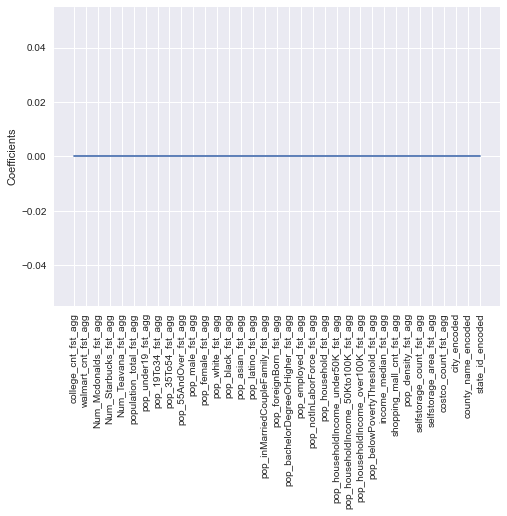

In [12]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,Y).coef_
_ = plt.plot(range(len(Names)), lasso_coef)
_ = plt.xticks(range(len(Names)), Names, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show

In [13]:
lasso.fit(X_train, Y_train)

r2_score = lasso.score(X_test, Y_test)
print("r2_score = ", r2_score * 100, "%")

r2_score =  -0.07519516729830311 %


In [14]:
reg = LinearRegression(normalize=True)
reg.fit(X_train, Y_train)


LinearRegression(normalize=True)

<function matplotlib.pyplot.show(close=None, block=None)>

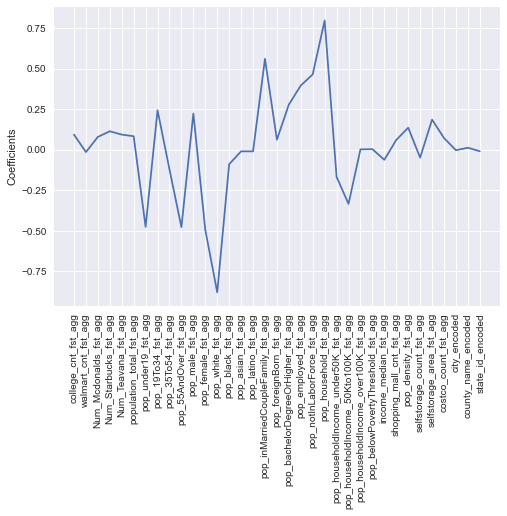

In [15]:
reg_coef = reg.fit(X,Y).coef_
_ = plt.plot(range(len(Names)), reg_coef)
_ = plt.xticks(range(len(Names)), Names, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show

In [16]:
Y_pred = reg.predict(X_train)
mse = mean_squared_error(Y_train, Y_pred)
mse

6.4250321618449336e-06

In [17]:
Y_pred = reg.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
mse

7.409233011785309e-06

In [18]:
reg.fit(X_train, Y_train)

r2_score = reg.score(X_test, Y_test)
print("r2_score = ", r2_score * 100, "%")

r2_score =  25.48245015654945 %


In [19]:
cv_results = cross_val_score(reg, X, Y, cv=10)
print(cv_results)


[0.14538593 0.20929708 0.22719052 0.04017238 0.09687841 0.09288557
 0.18682057 0.30981648 0.17772309 0.20691714]


In [20]:
from sklearn.linear_model import Ridge
rng=Ridge(alpha=0.5)
rng.fit(X_train, Y_train)

Ridge(alpha=0.5)

<function matplotlib.pyplot.show(close=None, block=None)>

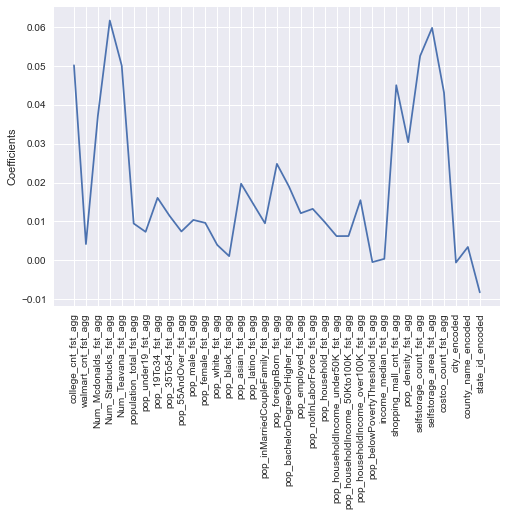

In [21]:
rng_coef = rng.fit(X,Y).coef_
_ = plt.plot(range(len(Names)), rng_coef)
_ = plt.xticks(range(len(Names)), Names, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show

In [22]:
Y_pred = rng.predict(X_train)
mse = mean_squared_error(Y_train, Y_pred)
mse

6.844079269518153e-06

In [23]:
Y_pred = rng.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
mse

7.958827339635122e-06

In [24]:
rng.fit(X_train, Y_train)

r2_score = rng.score(X_test, Y_test)
print("r2_score = ", r2_score * 100, "%")

r2_score =  18.964953781375126 %


In [25]:
cv_results = cross_val_score(rng, X, Y, cv=10)
print(cv_results)

[0.13058477 0.15661318 0.22861017 0.12993001 0.15162814 0.12967725
 0.19101424 0.28639532 0.20743429 0.11750191]


In [27]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
Tree_features = pd.DataFrame(rfr.feature_importances_, Names, columns=['Importance'])

Tree_features.Importance = Tree_features.Importance.abs()
Tree_features.head()

,Importance
college_cnt_fst_agg,0.035488
walmart_cnt_fst_agg,0.012036
Num_Mcdonalds_fst_agg,0.026444
Num_Starbucks_fst_agg,0.040537
Num_Teavana_fst_agg,0.017981


<function matplotlib.pyplot.show(close=None, block=None)>

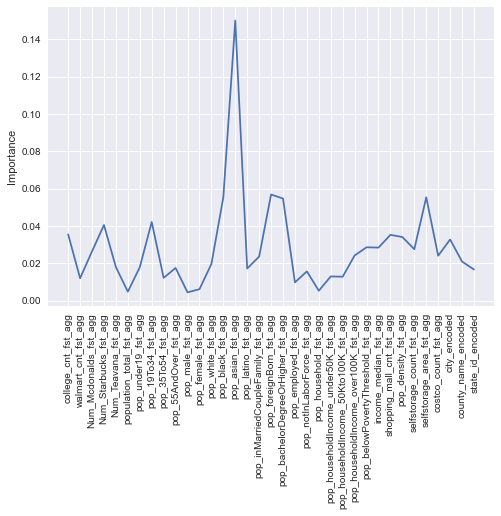

In [28]:
_ = plt.plot(range(len(Names)), Tree_features)
_ = plt.xticks(range(len(Names)), Names, rotation=90)
_ = plt.ylabel('Importance')
plt.show

In [31]:
Y_pred = rfr.predict(X_train)
mse = mean_squared_error(Y_train, Y_pred)
mse

8.551914958785024e-07

In [32]:
Y_pred = rfr.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
mse

6.629902153339598e-06

In [33]:
rfr.fit(X_train, Y_train)

r2_score = rfr.score(X_test, Y_test)
print("r2_score = ", r2_score * 100, "%")

r2_score =  33.97852355949129 %


In [34]:
cv_results = cross_val_score(rfr, X, Y, cv=5)
print(cv_results)

[0.19766322 0.1049742  0.19224586 0.325986   0.22796992]
